In [57]:
import pandas as pd
pd.set_option('display.width', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
loldt = pd.read_csv('games.csv')

In [59]:
# loldt = loldt.sample(n=15000, random_state = 42)

In [60]:
loldt.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [61]:
loldt.shape

(51490, 61)

In [62]:
loldt.head(15)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
5,3287435705,1501667992132,2059,9,1,2,2,1,1,2,...,6,0,0,3,0,119,134,154,63,31
6,3314215542,1503430065724,1993,9,1,1,2,1,1,1,...,2,0,0,0,0,75,42,31,40,429
7,3329224025,1504472363684,1334,9,1,1,1,0,0,2,...,0,0,0,2,0,157,38,122,40,238
8,3318040883,1503686577549,1387,9,2,2,2,2,0,2,...,8,1,0,2,1,28,51,53,157,40
9,3327786881,1504385918871,2681,9,2,2,2,2,2,2,...,8,3,1,2,0,64,141,84,67,53


In [63]:
loldt.drop('gameId' , axis = 1, inplace = True)

In [64]:
loldt['winner'].value_counts()

1    26077
2    25413
Name: winner, dtype: int64

In [65]:
loldt.columns

Index(['creationTime', 'gameDuration', 'seasonId', 'winner', 'firstBlood',
       'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon',
       'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2',
       't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id',
       't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1',
       't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2',
       't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4',
       't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills',

In [66]:
loldt.drop('t1_towerKills', axis=1, inplace=True)
loldt.drop('t2_towerKills', axis=1, inplace=True)
loldt.drop('seasonId', axis=1, inplace=True)
loldt.drop('t1_inhibitorKills', axis=1, inplace=True)
loldt.drop('t2_inhibitorKills', axis=1, inplace=True)
loldt.drop('creationTime', axis=1, inplace=True)
loldt.drop('firstInhibitor', axis=1, inplace=True)

In [67]:
loldt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        51490 non-null  int64
 1   winner              51490 non-null  int64
 2   firstBlood          51490 non-null  int64
 3   firstTower          51490 non-null  int64
 4   firstBaron          51490 non-null  int64
 5   firstDragon         51490 non-null  int64
 6   firstRiftHerald     51490 non-null  int64
 7   t1_champ1id         51490 non-null  int64
 8   t1_champ1_sum1      51490 non-null  int64
 9   t1_champ1_sum2      51490 non-null  int64
 10  t1_champ2id         51490 non-null  int64
 11  t1_champ2_sum1      51490 non-null  int64
 12  t1_champ2_sum2      51490 non-null  int64
 13  t1_champ3id         51490 non-null  int64
 14  t1_champ3_sum1      51490 non-null  int64
 15  t1_champ3_sum2      51490 non-null  int64
 16  t1_champ4id         51490 non-null  int6

In [68]:
from skimpy import skim

skim(loldt)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 51490  │ │ int32       │ 53    │                                                          │
│ │ Number of columns │ 53     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ gameDuration               │    0 │      0 │   1800 │    510 │   190 │   1500 │   2100 │   4700 │   ▁▅█▁   │  │
│ │ winner                     │    0 │      0 │    1.5 │    0.5 │     1 │      1 │      2 │      2 │  █    █  │  │
│ │ firstBlood                 │    0 │      0 │    1.5 │   0.52 │     0 │      1 │      2 │      2 │     █ █  │  │
│ │ firstTower                 │    0 │      0 │    1.5 │   0.54 │     0 │      1 │      2 │      2 │     █ █  │  │
│ │ firstBaron                 │    0 │      0 │   0.93 │   0.84 │     0 │      0 │      2 │      2 │  █  ▆ ▇  │  │
│ │ firstDragon                │    0 │      0 │    1.4 │   0.57 │     0 │      1 │      2 │      2 │  ▁  █ █  │  │
│ │ firstRiftHerald            │    0 │      0 │   0.73 │   0.82 │     0 │      0 │      1 │      2 │  █  ▄ ▄  │  │
│ │ t1_champ1id                │    0 │      0 │    110 │    120 │     1 │     35 │    140 │    520 │  █▄▁ ▁▁  │  │
│ │ t1_champ1_sum1             │    0 │      0 │    6.6 │      4 │     1 │      4 │     11 │     21 │   █▁ ▃   │  │
│ │ t1_champ1_sum2             │    0 │      0 │    7.3 │    4.3 │     1 │      4 │     11 │     21 │   █▂ ▅   │  │
│ │ t1_champ2id                │    0 │      0 │    120 │    120 │     1 │     35 │    140 │    520 │  █▄▁ ▁▁  │  │
│ │ t1_champ2_sum1             │    0 │      0 │    6.5 │      4 │     1 │      4 │     11 │     21 │   █▁ ▃   │  │
│ │ t1_champ2_sum2             │    0 │      0 │    7.2 │    4.2 │     1 │      4 │     11 │     21 │   █▂ ▅   │  │
│ │ t1_champ3id                │    0 │      0 │    120 │    120 │     1 │     35 │    140 │    520 │  █▄▁ ▁▁  │  │
│ │ t1_champ3_sum1             │    0 │      0 │    6.5 │      4 │     1 │      4 │     11 │     21 │   █▁ ▃   │  │
│ │ t1_champ3_sum2             │    0 │      0 │    7.2 │    4.2 │     1 │      4 │     11 │     21 │   █▂ ▅   │  │
│ │ t1_champ4id                │    0 │      0 │    120 │    120 │     1 │     36 │    140 │    520 │  █▄▁ ▁▁  │  │
│ │ t1_champ4_sum1             │    0 │      0 │    6.5 │      4 │     1 │      4 │     11 │     21 │   █▁ ▃   │  │
│ │ t1_champ4_sum2             │    0 │      0 │    7.2 │    4.2 │     1 │      4 │     11 │     21 │   █▂ ▅   │  │
│ │ t1_champ5id                │    0 │      0 │    110 │    120 │     1 │     35 │    140 │    520 │  █▄▁ ▁▁  │  │
│ │ t1_champ5_sum1             │    0 │      0 │    6.6 │      4 │     1 │      4 │     11 │     21 │   █▁ ▃   │  │
│ │ t1_champ5_sum2             │    0 │      0 │    7.3 │    4.3 │     1 │      4 │     11 │     21 │   █▂ ▅   │  │
│ │ t1_baronKills              │    0 │      0 │   0.37 

In [69]:
from sklearn import preprocessing

In [70]:
loldt.dtypes.unique()

array([dtype('int64')], dtype=object)

In [71]:
y = loldt['winner']
X = loldt.drop('winner', axis=1)

In [72]:
any(y.isna())

False

In [73]:
y.unique()

array([1, 2], dtype=int64)

In [74]:
loldt.head()

,gameDuration,winner,firstBlood,firstTower,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,...,t2_champ5_sum1,t2_champ5_sum2,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,1949,1,2,1,1,1,2,8,12,4,...,4,3,0,1,1,114,67,43,16,51
1,1851,1,1,1,0,1,1,119,7,4,...,4,7,0,0,0,11,67,238,51,420
2,1493,1,2,1,1,2,0,18,4,7,...,7,4,0,1,0,157,238,121,57,28
3,1758,1,1,1,1,1,0,57,4,12,...,4,7,0,0,0,164,18,141,40,51
4,2094,1,2,1,1,1,0,19,4,12,...,4,7,0,1,0,86,11,201,122,18


In [384]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [385]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41192, 52), (10298, 52), (41192,), (10298,))

In [386]:
from tqdm import tqdm

In [387]:
#On ne voit rien

In [388]:
#optimisation

In [389]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

LINEAR : #C10 #PCA40

In [390]:
from sklearn.linear_model import LogisticRegression

In [391]:
X_train

,gameDuration,firstBlood,firstTower,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,...,t2_champ5_sum1,t2_champ5_sum2,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
17204,2688,2,2,2,1,0,111,11,4,101,...,4,3,1,3,0,122,31,141,119,105
10157,1336,2,2,0,2,2,61,4,21,119,...,4,12,0,2,1,19,18,40,157,31
36198,926,2,1,0,1,0,22,7,4,64,...,4,12,0,0,0,-1,238,122,57,498
35306,2330,1,2,2,2,2,89,4,3,67,...,7,4,2,4,1,16,57,113,40,29
36319,2593,1,1,2,2,2,202,4,7,245,...,4,12,1,3,1,6,131,141,157,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1326,1,1,1,1,1,20,4,11,126,...,7,4,0,0,0,8,60,154,117,28
44732,2332,1,1,1,2,1,3,21,4,110,...,12,14,0,3,0,120,28,31,516,4
38158,2488,2,1,1,2,1,268,14,4,150,...,12,4,0,3,0,18,117,122,96,29
860,1726,2,2,1,1,0,113,11,4,429,...,4,7,0,0,0,141,238,16,18,53


In [392]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.03)

In [393]:
iso.fit(X_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.03)

In [394]:
outliers = iso.predict(X_train) == -1 
X_train[outliers]

,gameDuration,firstBlood,firstTower,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,...,t2_champ5_sum1,t2_champ5_sum2,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
426,1791,2,2,1,1,1,16,4,3,121,...,14,4,0,0,0,113,498,119,114,59
32739,2257,2,1,0,2,0,25,14,4,516,...,14,4,0,2,0,60,432,117,89,238
25044,2010,1,2,0,2,0,497,4,3,8,...,7,4,0,1,0,238,-1,122,53,23
19602,1897,2,2,2,2,2,497,4,3,163,...,4,21,2,2,1,154,40,157,19,114
38575,217,0,0,0,0,0,17,7,4,121,...,7,4,0,0,0,89,157,7,122,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12874,3055,1,2,2,1,1,44,4,3,78,...,7,4,3,4,0,18,40,117,7,113
15087,3099,2,2,2,2,1,412,4,11,1,...,4,12,2,2,0,63,122,105,31,157
40772,1613,1,2,2,2,2,412,3,4,134,...,4,3,1,1,1,498,122,11,105,24
32562,2171,2,2,2,1,0,92,12,4,61,...,4,21,2,4,0,157,122,134,117,53


In [395]:
X_train = X_train[~outliers]
y_train = y_train[~outliers]
X_train.shape, y_train.shape

((39956, 52), (39956,))

In [396]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [397]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
from sklearn.model_selection import cross_validate

depths = [1, 10, 15, 35, 50, 75, 100]
tree_train = []
tree_test = []
all_tree_train = {n:[] for n in depths}
all_tree_test = {n:[] for n in depths}

for n in tqdm(depths) :
        cv_tree = cross_validate(DecisionTreeClassifier(max_depth = n, random_state=42),X_train, y_train, cv = 5, return_train_score = True)
        tree_train.append(cv_tree['train_score'].mean())
        tree_test.append(cv_tree['test_score'].mean())
        
        all_tree_train[n] = cv_tree['train_score']
        all_tree_test[n] = cv_tree['test_score']

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:47<00:00,  6.75s/it]


In [174]:
tree_train, tree_test

([0.7341959635265287,
  0.9059526149731857,
  0.973817730229699,
  1.0,
  1.0,
  1.0,
  1.0],
 [0.7341960107130856,
  0.8414984558928852,
  0.8159594814317742,
  0.801514917253698,
  0.801514917253698,
  0.801514917253698,
  0.801514917253698])

In [175]:
all_tree_train, all_tree_test

({1: array([0.73498619, 0.73392407, 0.73435698, 0.73362869, 0.73408387]),
  10: array([0.90601766, 0.90635147, 0.90623293, 0.90456394, 0.90659707]),
  15: array([0.97517677, 0.97223318, 0.97408509, 0.97378164, 0.97381198]),
  35: array([1., 1., 1., 1., 1.]),
  50: array([1., 1., 1., 1., 1.]),
  75: array([1., 1., 1., 1., 1.]),
  100: array([1., 1., 1., 1., 1.])},
 {1: array([0.73103532, 0.73528341, 0.73355183, 0.73646516, 0.73464433]),
  10: array([0.83954363, 0.83905814, 0.84365137, 0.8412236 , 0.84401554]),
  15: array([0.81235587, 0.81660396, 0.81815975, 0.81342559, 0.81925225]),
  35: array([0.79912611, 0.80143221, 0.80298616, 0.79800923, 0.80602088]),
  50: array([0.79912611, 0.80143221, 0.80298616, 0.79800923, 0.80602088]),
  75: array([0.79912611, 0.80143221, 0.80298616, 0.79800923, 0.80602088]),
  100: array([0.79912611, 0.80143221, 0.80298616, 0.79800923, 0.80602088])})

0.7310353198203665
0.8390581381235587
0.8123558684306348
0.7980092255401796
0.7980092255401796
0.7980092255401796
0.7980092255401796


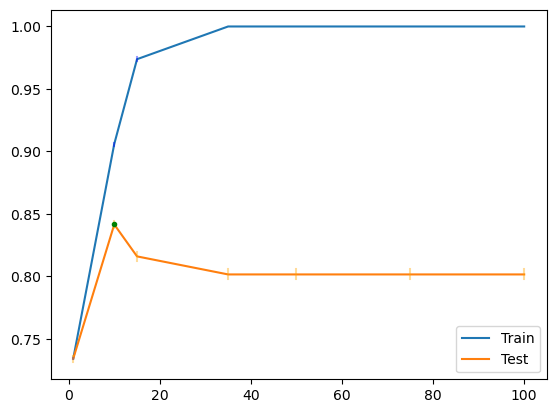

In [176]:
plt.plot(depths, tree_train, '-', label='Train')
plt.plot(depths, tree_test, '-', label='Test')

for n in depths:
    min_tree_train, max_tree_train = np.min(all_tree_train[n]), np.max(all_tree_train[n])
    min_tree_test, max_tree_test = np.min(all_tree_test[n]), np.max(all_tree_test[n])
    print(min_tree_test)
    plt.plot([n, n], [min_tree_train, max_tree_train], alpha = 0.4, color='b')
    plt.plot([n, n], [min_tree_test, max_tree_test], alpha = 0.4, color='orange')

best = np.argmax(tree_test)
plt.plot(depths[best], tree_test[best], marker ='.', c='green')
plt.legend()
plt.show()

In [360]:
best_max_d = 10

In [178]:
leafs = [2, 10, 30, 50, 75, 100]
tree_train_leaf = []
tree_test_leaf = []
all_tree_train_leaf = {l:[] for l in leafs}
all_tree_test_leaf = {l:[] for l in leafs}

for l in tqdm(leafs):
    cv_tree = cross_validate(DecisionTreeClassifier(max_depth=10, max_leaf_nodes=l, random_state=42), X_train, y_train, cv=5, return_train_score=True)
    tree_train_leaf.append(cv_tree['train_score'].mean())
    tree_test_leaf.append(cv_tree['test_score'].mean())
    
    all_tree_train_leaf[l] = cv_tree['train_score']
    all_tree_test_leaf[l] = cv_tree['test_score']


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:20<00:00,  3.49s/it]


In [179]:
tree_train_leaf, tree_test_leaf

([0.7341959635265287,
  0.841207028172513,
  0.8549779082996638,
  0.861823894093401,
  0.865750623609743,
  0.8704238642635724],
 [0.7341960107130856,
  0.8401144185979904,
  0.8543163497904805,
  0.8592445536643044,
  0.8586133943745015,
  0.8575452623331952])

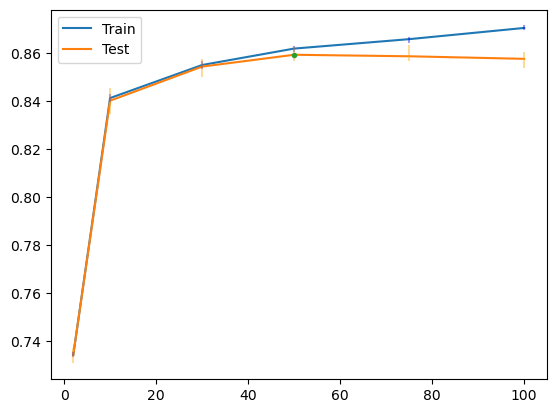

In [180]:
plt.plot(leafs, tree_train_leaf, label='Train')
plt.plot(leafs, tree_test_leaf, label='Test')

for l in leafs:
    min_train_leaf, max_train_leaf = np.min(all_tree_train_leaf[l]), np.max(all_tree_train_leaf[l])
    min_test_leaf, max_test_leaf = np.min(all_tree_test_leaf[l]), np.max(all_tree_test_leaf[l])
    
    plt.plot([l, l], [min_train_leaf, max_train_leaf], c='b', alpha=0.4)
    plt.plot([l, l], [min_test_leaf, max_test_leaf], c='orange', alpha=0.4) 
best = np.argmax(tree_test_leaf)    
plt.plot(leafs[best], tree_test_leaf[best], marker='.')

plt.legend()
plt.show()

In [359]:
best_max_l = 50

In [182]:
alphas = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
tree_train_alpha = []
tree_test_alpha = []
all_tree_train_alpha = {a:[] for a in alphas}
all_tree_test_alpha = {a:[] for a in alphas}

for a in tqdm(alphas):
    cv_tree = cross_validate(DecisionTreeClassifier(max_depth=best_max_d, max_leaf_nodes=best_max_l, random_state=42, ccp_alpha = a), X_train, y_train, cv=5, return_train_score=True)
    tree_train_alpha.append(cv_tree['train_score'].mean())
    tree_test_alpha.append(cv_tree['test_score'].mean())
    
    all_tree_train_alpha[a] = cv_tree['train_score']
    all_tree_test_alpha[a] = cv_tree['test_score']

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:25<00:00,  3.68s/it]


In [183]:
tree_train_alpha, tree_test_alpha

([0.861823894093401,
  0.825833888844809,
  0.8242619849194733,
  0.7743493819189583,
  0.7605117477755045,
  0.7341959635265287,
  0.7341959635265287],
 [0.8592445536643044,
  0.8243832522096233,
  0.8242618694164188,
  0.7743492872455306,
  0.7605117165939704,
  0.7341960107130856,
  0.7341960107130856])

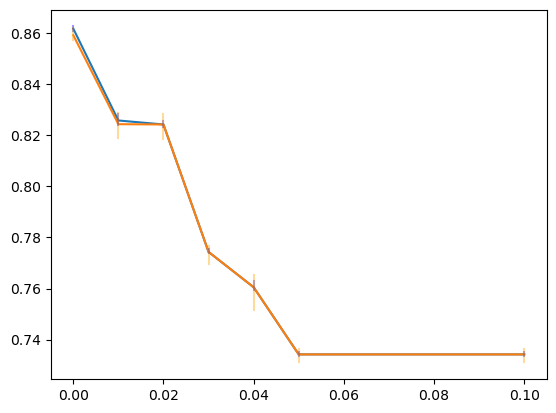

In [184]:
plt.plot(alphas, tree_train_alpha)
plt.plot(alphas, tree_test_alpha)

for a in alphas:
    min_train_alpha, max_train_alpha = np.min(all_tree_train_alpha[a]), np.max(all_tree_train_alpha[a])
    min_test_alpha, max_test_alpha = np.min(all_tree_test_alpha[a]), np.max(all_tree_test_alpha[a])
    
    plt.plot([a,a], [min_train_alpha, max_train_alpha], c='b', alpha=0.4)
    plt.plot([a,a], [min_test_alpha, max_test_alpha], c='orange', alpha=0.4)

plt.show()

In [185]:
#sans alpa_cpp

In [361]:
#preproc
estimator = DecisionTreeClassifier(max_depth = best_max_d, max_leaf_nodes = best_max_l, random_state=42)

In [187]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(estimator, threshold='mean')
model.fit_transform(X_train, y_train)

array([[2688,    2,    2, ...,    1,    1,    3],
       [1336,    2,    0, ...,    0,    0,    2],
       [ 926,    1,    0, ...,    1,    0,    0],
       ...,
       [2488,    1,    1, ...,    1,    0,    3],
       [1726,    2,    1, ...,    2,    0,    0],
       [2412,    2,    2, ...,    2,    1,    2]], dtype=int64)

In [188]:
model.estimator_.feature_importances_

array([0.02939503, 0.0015011 , 0.12302493, 0.03341526, 0.01177509,
       0.00096906, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.25497131, 0.05824639, 0.00228188, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00090822, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.09324634,
       0.38945977, 0.00080562, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [194]:
thresholds = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
prep_train_scores = []
prep_test_scores = []

sfm_all_train = {threshold:[] for threshold in thresholds}
sfm_all_test = {threshold:[] for threshold in thresholds}
for threshold in tqdm(thresholds):
    pipe_prep = make_pipeline(SelectFromModel(estimator=estimator, threshold=threshold), DecisionTreeClassifier(max_depth = best_max_d, max_leaf_nodes = best_max_l, random_state=42))
    cv = cross_validate(pipe_prep,X_train, y_train, cv=5, return_train_score = True)
    
    prep_test_scores.append(cv['test_score'].mean())
    prep_train_scores.append(cv['train_score'].mean())
    
    sfm_all_train[threshold]=cv['train_score']
    sfm_all_test[threshold]=cv['test_score']

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:26<00:00,  4.45s/it]


In [191]:
prep_train_scores , prep_test_scores

([0.8597361156929104,
  0.851961537758067,
  0.8250206369515032,
  0.8080513178029275],
 [0.8574480659300721,
  0.8496794463509005,
  0.8226354024571993,
  0.8076082197305251])

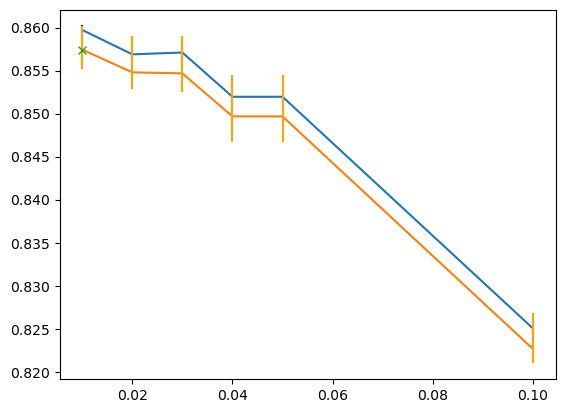

In [195]:
plt.plot(thresholds, prep_train_scores)
plt.plot(thresholds, prep_test_scores)
for threshold in thresholds:
    min_train, max_train = np.min(sfm_all_train[threshold]), np.max(sfm_all_train[threshold])
    min_test, max_test = np.min(sfm_all_test[threshold]), np.max(sfm_all_test[threshold])
    
    plt.plot([threshold, threshold], [min_train, max_train], c='b')
    plt.plot([threshold, threshold], [min_test, max_test], c='orange')

plt.plot(thresholds[np.argmax(prep_test_scores)], prep_test_scores[np.argmax(prep_test_scores)], marker='x')

In [362]:
threshold = 0.01

In [398]:
from sklearn.feature_selection import SelectFromModel
dfm_opti = SelectFromModel(estimator=estimator, threshold=threshold)
X_train_sfm = dfm_opti.fit_transform(X_train, y_train)
X_test_sfm = dfm_opti.transform(X_test)

In [399]:
estimator.fit(X_train_sfm, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, random_state=42)

In [400]:
estimator.score(X_test_sfm, y_test)

0.8570596232278113

In [401]:
feature_mask = dfm_opti.get_support()

selected_features = X_train.columns[feature_mask]

print(selected_features)

Index(['gameDuration', 'firstTower', 'firstBaron', 'firstDragon',
       't1_baronKills', 't1_dragonKills', 't2_baronKills', 't2_dragonKills'],
      dtype='object')


In [402]:
estimator.feature_importances_

array([0.02791627, 0.12608579, 0.02235425, 0.01275629, 0.24704639,
       0.06495211, 0.10745784, 0.39143106])

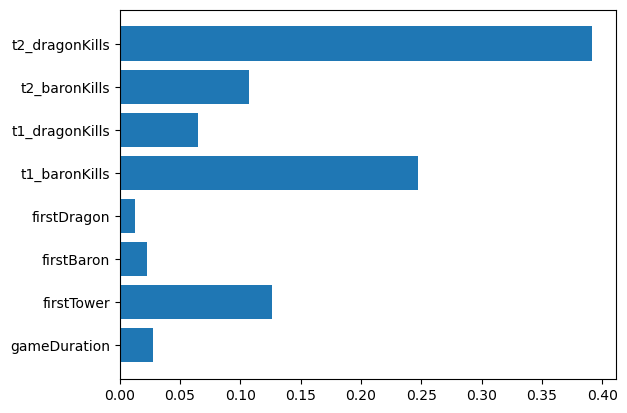

In [403]:
plt.barh(selected_features, estimator.feature_importances_)
plt.show()

In [406]:
X_train_scaled.shape

(39956, 52)

In [407]:
from sklearn.linear_model import SGDClassifier

In [285]:
pipe = make_pipeline(StandardScaler(), SGDClassifier(random_state=42))
grid = {
    'sgdclassifier__loss': ['hinge','log_loss'],
    'sgdclassifier__max_iter':[100, 150, 250],
    'sgdclassifier__alpha':[0.001, 0.01, 0.1]
}
sgd = GridSearchCV(pipe, grid, cv=5)
sgd

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=42))]),
             param_grid={'sgdclassifier__alpha': [0.001, 0.01, 0.1],
                         'sgdclassifier__loss': ['hinge', 'log_loss'],
                         'sgdclassifier__max_iter': [100, 150, 250]})

In [286]:
sgd.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=42))]),
             param_grid={'sgdclassifier__alpha': [0.001, 0.01, 0.1],
                         'sgdclassifier__loss': ['hinge', 'log_loss'],
                         'sgdclassifier__max_iter': [100, 150, 250]})

In [287]:
sgd.best_params_ , sgd.best_score_

({'sgdclassifier__alpha': 0.001,
  'sgdclassifier__loss': 'hinge',
  'sgdclassifier__max_iter': 100},
 0.8499949950556098)

In [113]:
loss = 'hinge'
max_iter = 100
alpha =0.001

In [305]:
pipe2 = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge', max_iter=max_iter, random_state=42))

grid2 = {
    'sgdclassifier__penalty': [None, 'l1', 'l2', 'elasticnet'],
    'sgdclassifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'sgdclassifier__eta0': [0.01]  
}

sgd2 = GridSearchCV(pipe2, grid2, cv=5)
sgd2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(max_iter=100,
                                                      random_state=42))]),
             param_grid={'sgdclassifier__eta0': [0.01],
                         'sgdclassifier__learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                         'sgdclassifier__penalty': [None, 'l1', 'l2',
                                                    'elasticnet']})

In [310]:
sgd2.best_score_, sgd2.best_params_

(0.8508447011282062,
 {'sgdclassifier__eta0': 0.01,
  'sgdclassifier__learning_rate': 'adaptive',
  'sgdclassifier__penalty': None})

In [370]:
penalty=None
learning_rate = 'adaptive'

In [314]:
pipe3 = make_pipeline(StandardScaler(), SGDClassifier(loss=loss, max_iter=max_iter, random_state=42,learning_rate=learning_rate))

grid3 = {
    'sgdclassifier__eta0': [0.001, 0.01, 0.1]  
}

sgd3 = GridSearchCV(pipe3, grid3, cv=5)
sgd3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(learning_rate='adaptive',
                                                      max_iter=100,
                                                      random_state=42))]),
             param_grid={'sgdclassifier__eta0': [0.001, 0.01, 0.1]})

In [315]:
sgd3.best_score_, sgd3.best_params_

(0.8508689818122059, {'sgdclassifier__eta0': 0.001})

In [371]:
eta0 = 0.001

In [59]:
from sklearn.model_selection import cross_validate
ncomp_ = np.arange(1,50,1)
train_res = []
test_res = []
all_train = {nc:[] for nc in ncomp_}
all_test = {nc:[] for nc in ncomp_}
for nc in tqdm(ncomp_):
    pipe = make_pipeline(StandardScaler(), PCA(n_components=nc), SGDClassifier(loss=loss, max_iter=max_iter,penalty=penalty,learning_rate=learning_rate,eta0=eta0, alpha=alpha))
    cv = cross_validate(pipe, X_train,y_train, cv=5, return_train_score=True)
    
    train_res.append(cv['train_score'].mean())
    test_res.append(cv['test_score'].mean())
    
    all_train[nc] = cv['train_score']
    all_test[nc] = cv['test_score']

train_res, test_res

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [02:46<00:00,  3.40s/it]


([0.75663356599842,
  0.7779969268495367,
  0.7943957582170237,
  0.7943593346125294,
  0.794917695127907,
  0.7951968896590341,
  0.7942197332030643,
  0.7949723253777934,
  0.7956277690320686,
  0.795160477289117,
  0.7941287014494912,
  0.7950390832617376,
  0.7962286492914009,
  0.8193702368949296,
  0.8191821255017535,
  0.8178044009305243,
  0.8194066347151484,
  0.8201653141890146,
  0.819855784641744,
  0.822514090604777,
  0.8211788706752838,
  0.8222166746943861,
  0.8225929610205606,
  0.8237036221940149,
  0.8233152071287423,
  0.8236186705568166,
  0.8237461231522829,
  0.8229207091844939,
  0.8234547956460695,
  0.8237582544698088,
  0.8239888822918182,
  0.8244440642655316,
  0.8246140060321687,
  0.8314782069432741,
  0.8334992147518561,
  0.8330136828439538,
  0.8380389368751959,
  0.8416804160549247,
  0.8419474602986663,
  0.8419353194041237,
  0.8421356013437593,
  0.8421416729881577,
  0.8419353181149098,
  0.8419110420352002,
  0.8418503495337589,
  0.842287327808

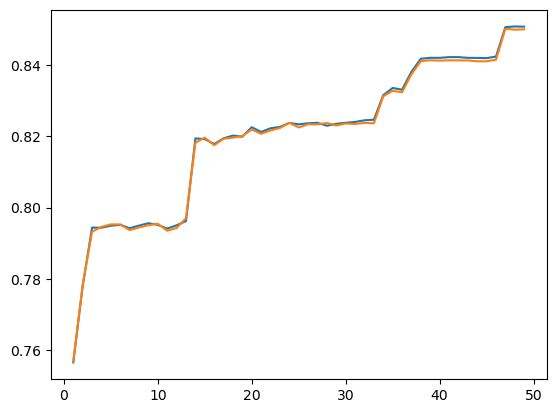

In [61]:
plt.plot(ncomp_,train_res)
plt.plot(ncomp_,test_res)
plt.show()

In [62]:
#PCA semble pas utile

In [408]:
sgd_opti = SGDClassifier(loss=loss, max_iter=max_iter,penalty=penalty,learning_rate=learning_rate,eta0=eta0, alpha=alpha)
sgd_opti.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.001, eta0=0.001, learning_rate='adaptive', max_iter=100,
              penalty=None)

In [409]:
SGDSCORE = sgd_opti.score(X_test_scaled, y_test)
SGDSCORE

0.8516216741114779

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
model_rf.best_score_, model_rf.best_params_

(0.8484412905878964, {'n_estimators': 100})

In [144]:
n_estimators = 100

In [427]:
grid_rf2 = {
    'n_estimators':[500, 800, 1000],
    'max_depth' :[10],
    'max_leaf_nodes' :[400, 600, 800]
}
model_rf2= RandomizedSearchCV(RandomForestClassifier(random_state=42), grid_rf2,random_state=42, n_iter=8, cv=5, verbose=2)
model_rf2

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=8,
                   param_distributions={'max_depth': [10],
                                        'max_leaf_nodes': [400, 600, 800],
                                        'n_estimators': [500, 800, 1000]},
                   random_state=42, verbose=2)

In [428]:
model_rf2.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .max_depth=10, max_leaf_nodes=800, n_estimators=800; total time= 1.1min
[CV] END .max_depth=10, max_leaf_nodes=800, n_estimators=800; total time= 1.2min
[CV] END .max_depth=10, max_leaf_nodes=800, n_estimators=800; total time= 1.2min
[CV] END .max_depth=10, max_leaf_nodes=800, n_estimators=800; total time= 1.2min
[CV] END .max_depth=10, max_leaf_nodes=800, n_estimators=800; total time= 1.2min
[CV] END .max_depth=10, max_leaf_nodes=400, n_estimators=800; total time= 1.1min
[CV] END .max_depth=10, max_leaf_nodes=400, n_estimators=800; total time= 1.1min
[CV] END .max_depth=10, max_leaf_nodes=400, n_estimators=800; total time=  53.2s
[CV] END .max_depth=10, max_leaf_nodes=400, n_estimators=800; total time=  46.9s
[CV] END .max_depth=10, max_leaf_nodes=400, n_estimators=800; total time=  46.0s
[CV] END max_depth=10, max_leaf_nodes=600, n_estimators=1000; total time= 1.0min
[CV] END max_depth=10, max_leaf_nodes=600, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=8,
                   param_distributions={'max_depth': [10],
                                        'max_leaf_nodes': [400, 600, 800],
                                        'n_estimators': [500, 800, 1000]},
                   random_state=42, verbose=2)

In [430]:
model_rf2.best_score_, model_rf2.best_params_

(0.8584442438934993,
 {'n_estimators': 500, 'max_leaf_nodes': 600, 'max_depth': 10})

In [431]:
max_depth = 10
max_leaf_nodes = 600
n_estimators = 500

In [432]:
rdf = RandomForestClassifier(n_estimators = n_estimators, max_leaf_nodes = max_leaf_nodes, max_depth=max_depth)
rdf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=600, n_estimators=500)

In [433]:
rdf.score(X_test, y_test)

0.8578364731015731

<BarContainer object of 52 artists>

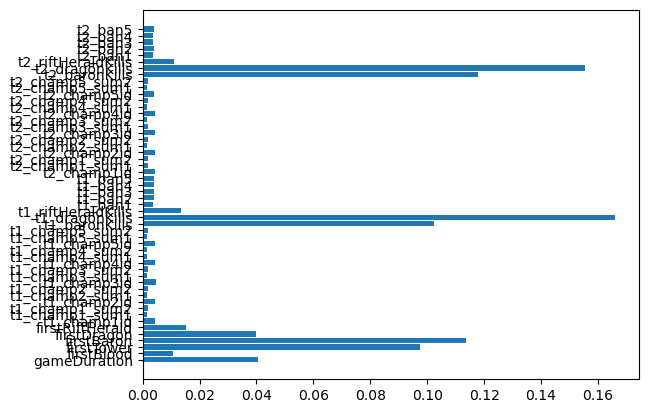

In [434]:
plt.barh(X_train.columns, rdf.feature_importances_)

In [267]:
from sklearn.ensemble import AdaBoostClassifier

In [275]:
ada = AdaBoostClassifier()

ada_grid= {
    'n_estimators':[500, 600, 800],
    'learning_rate':[0.001, 0.01, 0.1]
}

mod = GridSearchCV(ada, ada_grid, cv=5, verbose=2)
mod

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 600, 800]},
             verbose=2)

In [276]:
mod.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..............learning_rate=0.001, n_estimators=500; total time=  36.7s
[CV] END ..............learning_rate=0.001, n_estimators=500; total time=  40.3s
[CV] END ..............learning_rate=0.001, n_estimators=500; total time=  51.8s
[CV] END ..............learning_rate=0.001, n_estimators=500; total time=  50.0s
[CV] END ..............learning_rate=0.001, n_estimators=500; total time=  47.0s
[CV] END ..............learning_rate=0.001, n_estimators=600; total time=  58.3s
[CV] END ..............learning_rate=0.001, n_estimators=600; total time=  56.6s
[CV] END ..............learning_rate=0.001, n_estimators=600; total time=  57.2s
[CV] END ..............learning_rate=0.001, n_estimators=600; total time=  56.8s
[CV] END ..............learning_rate=0.001, n_estimators=600; total time=  59.0s
[CV] END ..............learning_rate=0.001, n_estimators=800; total time= 1.3min
[CV] END ..............learning_rate=0.001, n_est

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 600, 800]},
             verbose=2)

In [280]:
mod.best_score_, mod.best_params_

(0.8472032232254408, {'learning_rate': 0.1, 'n_estimators': 800})

In [435]:
ada_opti = AdaBoostClassifier(n_estimators=800, learning_rate=0.1)
ada_opti.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=800)

In [436]:
ada_opti.score(X_test, y_test)

0.8491940182559721